In [1]:
# selenium을 사용하기 위해 selenium을 설치하고 import 한다.
# !pip install selenium

In [2]:
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
from selenium import webdriver

<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36"><head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/ed
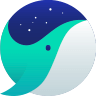
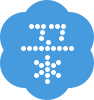

In [5]:
# selenium을 사용해 가상 크롬을 실행한다. => 사용중인 크롬 버전과 같은 버전의 크롬 드라이버를 다운받는다.
driver = webdriver.Chrome('./chromedriver.exe')
# get() 메소드로 가상 크롬에 크롤링할 타겟 사이트를 띄운다.
driver.get('https://www.naver.com/')

html = driver.page_source
print(html)

In [6]:
# 연령대별 실시간 급상승 검색어만 크롤링
ageList = {'1': '10s', '2': '20s', '3': '30s', '4': '40s', '5': '50s', '6': 'all'}
url1 = 'https://datalab.naver.com/keyword/realtimeList.naver?age='
url2 = '&entertainment=0&groupingLevel=2&marketing=0&news=0&sports=0&where=main'
key = input('연령대를 입력하세요(1 => 10대, 2 => 20대, 3 => 30대, 4 => 40대, 5 => 50대, 6 => 전체) : ')
targetSite = '{}{}{}'.format(url1, ageList[key], url2)

driver = webdriver.Chrome('./chromedriver.exe')
driver.get(targetSite)
html = driver.page_source
soup = BeautifulSoup(html)

titles = soup.findAll('span', {'class': 'item_title'})
for i in range(len(titles)):
    print('{0:2d}위 : {1}'.format(i + 1, titles[i].text))

연령대를 입력하세요(1 => 10대, 2 => 20대, 3 => 30대, 4 => 40대, 5 => 50대, 6 => 전체) : 1
 1위 : 시동
 2위 : 걸캅스
 3위 : 캡틴
 4위 : 심석희
 5위 : 엠넷 캡틴
 6위 : 환생테스트
 7위 : 맛남의 광장 방탄
 8위 : 조재범
 9위 : 쿠키런 킹덤
10위 : 방구석 연구소
11위 : 리라아트고등학교
12위 : 7일만 로맨스2
13위 : t1 젠지
14위 : 신비아파트 고스트볼 더블x 수상한 의뢰
15위 : 숲나학교
16위 : 힘을내요 미스터리
17위 : 송호고등학교
18위 : 범인은 바로 너 시즌3
19위 : 병무청
20위 : 연애혁명
